# Redes de monitorización basadas en nodos IoT 
## ECI 33, 22-27 de Julio 2019

**Nombre y apellido:** Emiliano Pedro López - emiliano.lopez@gmail.com

### Pregunta 1
Un sistema de transmisión radio utiliza un ancho de banda $Bw = 2 \text{MHz}$. El sistema transmite $10^4$ símbolos por segundo con una modulación 16-QAM, y usa un código de corrección de errores de tasa 1/2 (es decir, 50% de los bits son de redundancia). La SNR en el receptor es de 10.

**a) ¿Cuál es la eficiencia espectral?**

La eficiencia espectral (Ee) nos dice cuan eficientemente se utiliza el ancho de banda y se se calcula como la tasa entre la velocidad R en bits/segundos y el ancho de banda Bw en Hertz, esto es:

$$Ee = \frac{R}{Bw}$$

Para el sistema dado, debemos primeramente convertir la velocidad de transmisión a bits/segundo. La modulación 16-QAM transmite 16 símbolos cuyo significado depende de la amplitud y la fase de la señal, cada símbolo representa 4 bits, ya que $log_2 (16)=4$, por lo tanto tenemos una velocidad de transmisión de $4 * 10^4$ [bits/seg], sin embargo, para calcular la eficiencia espectral debemos excluir los bits de redundancia para corrección de errores por lo que nos queda:

$$Ee = \frac{2 * 10^4 \text{[bits/seg]}}{2 * 10^6 \text{[Hz]}} = 0.01 \text{[bits/seg/hz]}$$




**b) ¿Cuál es la capacidad del sistema suponiendo un canal AWGN (Ruido blanco gaussiano y aditivo)?**

La capacidad maxima del sistema, en bits/segundo, verifica la siguiente ecuación:

$$C = Bw * log_2(1+\text{S/N})$$

donde Bw es el ancho de banda del canal en hertzios y S/N es la tasa entre la potencia promedio de la señal recibida (S) y la potencia del ruino (N) . Esta fórmula de Shannon representa el máximo límite teórico que se puede conseguir ya que únicamente supone ruido blanco (ruido térmico) sin tener en cuenta el ruido impulsivo, la atenuación o la distorsión de retardo \[1\].

Del enunciado tenemos el dato de $\text{SNR}= 10$ por lo que S/N = 10 ya que $10^{10/10} = 10$, de modo que la capacidad del sistema se obtiene:

$$C = 2 \text{[MHz]} * log_2(11) = 6.9 \text{[Mbps]}$$

### Pregunta 2
Un Smartphone está inicialmente en la posición indicada en Figura 1. Lo movemos, y obtenemos la siguiente lectura del giróscopo (Figura 2). Dibujar su posición final

<img src="axis.png" alt="Drawing" style="width: 200px;"/> 
<center>Figura 1</center>
<img src="giroscopo.png" alt="Drawing" style="width: 250px;"/>
<center>Figura 2</center>

En el sistema de coordenadas del smartphone una rotación es positiva cuando el giro es en sentido antihorario y es negativa cuando es en sentido horario, siempre sobre el plano ortogonal al eje en cuestión \[2\]. Por lo tanto, para las salidas observadas en la Figura 2 todas las rotaciones son de 180° en sentido antihorario. En la Figura 3 se observan los planos de rotación de cada eje, donde el eje X refiere al pitch, el eje Y al roll y el eje Z al yaw. 


<img src="diagrama_ejes.png" alt="Drawing" style="width: 200px;"/> 
<center>Figura 3: planos de rotación para cada eje</center>

Luego de las tres rotaciones indicadas, la posición final es la siguiente (Figura 4):

<img src="posicion_final.png" alt="Drawing" style="width: 400px;"/> 
<center>Figura 4: Desde la posición inicial (izqquierda) a la <b>posición final (derecha)</b></center>


### Pregunta 3

Para la curva de calibración de un sensor de gases usamos dos parámetros de entrada (R, resistencia, T, temperatura). Para calibrar el sensor hemos tomado 4 medidas, obteniendo:

| Resistencia(K$\Omega$) | Temperatura (°C) | Concentración gas ($\mu g/m^3$)|
|----------------|------------------|-------------------|
| 10             | 20               | 20                |
| 20             | 30               | 40                |
| 15             | 25               | 35                |
| 10             | 25               | 25                |

Dar el valor de concentración de gas estimado si tenemos una lectura de R=15, T=22, en el caso de usar:

### Respuesta

La resolución de los métodos de regresión solicitados se ha realizado usando bibliotecas de python para visualización (Matplotlib \[3\]), análisis de datos (Pandas, \[4\]) y machine learning (Scikitlearn, \[5\]).

De modo que no no ha sido necesario normalizar los datos (esto es $x=(x-\mu)/\sigma$) ya que esto se realiza intrínsecamente por scikitlearn. Una vez cargados los datos el procedimiento es similar tanto para *k-NN* como para *Decision tree regression*: 

- Instanciar el tipo de regresión a utilizar con sus parámetros
- Ajustar los datos usando el modelo instanciado
- Predicción el nuevo valor a partir de datos nuevos

Usamos la totalidad de los datos para el entrenamiento (no una parte como se recomienda), ya que del enunciado se interpreta esto.

#### a) k-NN con k=2

##### Carga de datos y visualización exploratoria

In [102]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
# Creamos dataframe con datos del enunciado
data_raw = pd.DataFrame(columns = ["Resistencia", "Temperatura", "Concentracion"], 
                           data = [[10,20,20], [20,30,40],[15,25,35],[10,25,25],[15,22]])

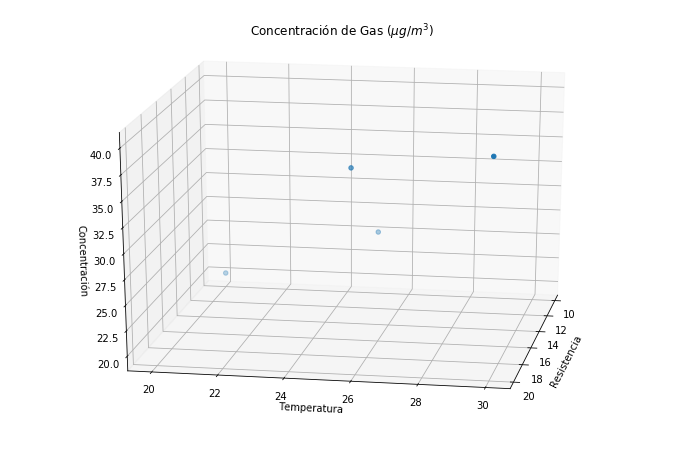

In [103]:
%matplotlib inline
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw.Resistencia, data_raw.Temperatura, data_raw.Concentracion, marker='o')
ax.set(xlabel='Resistencia', ylabel='Temperatura', zlabel='Concentración')
ax.set_title("Concentración de Gas ($\mu g/m^3$)")
ax.view_init(20, 10)
plt.show()

##### Procesamiento y modelado

In [104]:
# Columnas para hacer la prediccion (x) y la que pretendemos predecir (y)
x_col = ["Resistencia", "Temperatura"]
y_col = ["Concentracion"]

# excluimos la ultima fila,ya q tiene los datos para predecir
x = data_raw[x_col][:-1] 
y = data_raw[y_col][:-1] 

# Creamos el modelo con k=2 y lo ajustamos
knn = KNeighborsRegressor(n_neighbors=2)
model_knn = knn.fit(x, y)

##### Predicción y visualización

- Obtenemos un valor de concentración de **27.5**

In [105]:
# Hacemos la prediccion del nuevo punto usando el modelo ajustado previamente
data_new = data_raw[x_col][-1:]
predictions = model.predict(data_new[x_col])
print(predictions)

[[27.5]]


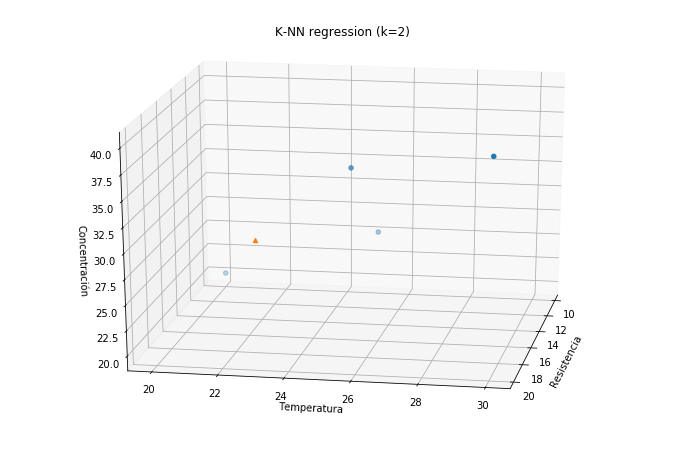

In [107]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw.Resistencia, data_raw.Temperatura, data_raw.Concentracion, marker='o')
ax.scatter(15, 22, 27.5, marker='^')
ax.set(xlabel='Resistencia', ylabel='Temperatura', zlabel='Concentración')
ax.set_title("K-NN regression (k=2)")
ax.view_init(20, 10)
plt.show()

### b) Decision tree regression, (no utilizar bagging).

#### Modelado

In [111]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

model_dtr = regressor.fit(x, y)

#### Predicción y visualización

- Obtenemos un valor de concentración de **35**

In [112]:
y_pred = model_dtr.predict(data_new)
y_pred

array([35.])

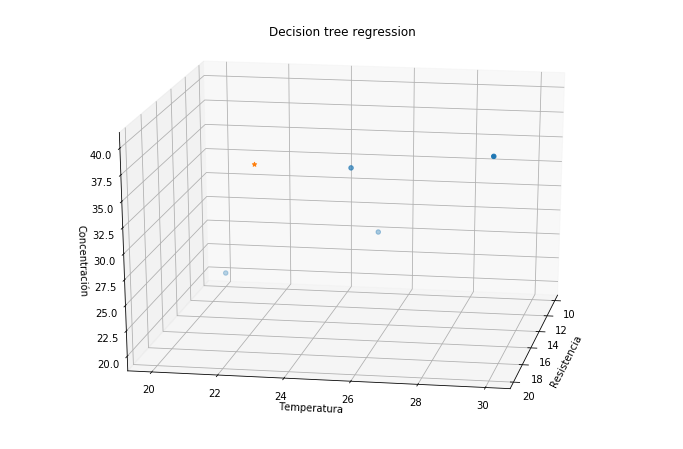

In [110]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_raw.Resistencia, data_raw.Temperatura, data_raw.Concentracion, marker='o')
ax.scatter(15, 22, 35, marker='*')
ax.set(xlabel='Resistencia', ylabel='Temperatura', zlabel='Concentración')
ax.set_title("Decision tree regression")
ax.view_init(20, 10)
plt.show()

## Referencias

\[1\] William Stallings, 2001. Comunicaciones y Redes de Computadoras. Edición 6ta. Prentice Hall.

\[2\] Android Developer Guide. Motion Sensors. Accedida 10/08/2019. https://developer.android.com/guide/topics/sensors/sensors_motion

\[3\] Matplotlib, Python plotting. Accedida 10/08/2019. https://matplotlib.org/

\[4\] Python Data Analisys Library, pandas. Accedida 10/08/2019. https://pandas.pydata.org/

\[5\] Scikit-learn, Machine Learning in Python. Accedida 10/08/2019. https://scikit-learn.org